In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import numpy as np
data = {'imgs':[],'ratings':[],'ratings_volume':[],'product_urls':[],'price_l':[]}


In [67]:
cnt = 0
n = 3 # pages scraping
url = 'https://www.flipkart.com/search?q=saree&page=1'
d = {'imgs':[],'ratings':[],'ratings_volume':[],'product_urls':[],'price_l':[]}
def scrap(url):    
    global cnt
    response = urlopen(url)

    data = response.read()
    s_data = soup(data,'html.parser')
    s_obj = s_data.findAll('div',{'class':'_13oc-S'})
    s = s_obj[0]
    c = s.find_all("div")
    p = c[1]['class'][1]
    s_obj = s_data.findAll('div',{'class':f"{p}"})
    return s_obj

In [68]:
x = scrap(url)

In [72]:
print(x[0].a.attrs['href'])

/trijal-fab-embroidered-bollywood-silk-blend-saree/p/itm4d9ba6f222a08?pid=SARFSFNFGAJSN9DE&lid=LSTSARFSFNFGAJSN9DEZ2HDPY&marketplace=FLIPKART&q=saree&store=clo%2F8on%2Fzpd%2F9og&srno=s_1_1&otracker=search&fm=organic&iid=en_mwR6I5j7w0dm52fnj9Go03%2Bgo%2Fb20Mmct6pgaA5u6kWdrbFj2PZ21LWwNLtYM3dCqyDMxz%2FvTwitLfUinQ0BKQ%3D%3D&ppt=None&ppn=None&ssid=n56i6t66sg0000001623561338638&qH=3a4bc565a4835306


In [35]:
import pandas as pd
df = pd.DataFrame(d)

In [5]:
df.head()

,imgs,ratings,ratings_volume,product_urls,price_l
0,https://rukminim1.flixcart.com/image/612/612/j...,4.2,45,/parker-vector-standard-ct-fountain-pen-card-h...,425
1,https://rukminim1.flixcart.com/image/612/612/k...,4.2,72,/luxor-finewriter-fineliner-pen/p/itm7484dfe25...,100
2,https://rukminim1.flixcart.com/image/612/612/k...,4.4,"3,16",/cello-maxriter-ball-pen/p/itm37f836d5335c5?pi...,192
3,https://rukminim1.flixcart.com/image/612/612/j...,4.4,"44,85",/cello-butterflow-simply-ball-pen-jar/p/itmf8a...,192
4,https://rukminim1.flixcart.com/image/612/612/k...,4.6,"3,08",/hauser-xo-ball-pen/p/itmaacac4197601c?pid=PEN...,376


In [6]:
df['price_l'] = df['price_l'].replace(',','', regex=True)
df['ratings_volume'] = df['ratings_volume'].replace(',','',regex=True)

In [7]:
df.head()

,imgs,ratings,ratings_volume,product_urls,price_l
0,https://rukminim1.flixcart.com/image/612/612/j...,4.2,45,/parker-vector-standard-ct-fountain-pen-card-h...,425
1,https://rukminim1.flixcart.com/image/612/612/k...,4.2,72,/luxor-finewriter-fineliner-pen/p/itm7484dfe25...,100
2,https://rukminim1.flixcart.com/image/612/612/k...,4.4,316,/cello-maxriter-ball-pen/p/itm37f836d5335c5?pi...,192
3,https://rukminim1.flixcart.com/image/612/612/j...,4.4,4485,/cello-butterflow-simply-ball-pen-jar/p/itmf8a...,192
4,https://rukminim1.flixcart.com/image/612/612/k...,4.6,308,/hauser-xo-ball-pen/p/itmaacac4197601c?pid=PEN...,376


In [8]:
rating = 5
no_ratings = 300

In [9]:
df.sort_values("ratings",axis=0,ascending = False,inplace=True)

In [10]:
df.head()

,imgs,ratings,ratings_volume,product_urls,price_l
54,https://rukminim1.flixcart.com/image/612/612/k...,4.6,11,/pilot-v5-blue-5-roller-ball-pen/p/itm745be7d9...,256
109,https://rukminim1.flixcart.com/image/612/612/k...,4.6,138,/classmate-octane-gel-pen/p/itm2952d3ab15195?p...,237
4,https://rukminim1.flixcart.com/image/612/612/k...,4.6,308,/hauser-xo-ball-pen/p/itmaacac4197601c?pid=PEN...,376
81,https://rukminim1.flixcart.com/image/612/612/k...,4.5,74,/flair-marathon-jar-ball-pen/p/itme3291fe073b6...,269
20,https://rukminim1.flixcart.com/image/612/612/k...,4.5,932,/luxor-uniflo-ball-pen/p/itmd3fdfde440836?pid=...,153


In [11]:
df.reset_index(drop=True, inplace=True)

df.head()

,imgs,ratings,ratings_volume,product_urls,price_l
0,https://rukminim1.flixcart.com/image/612/612/k...,4.6,11,/pilot-v5-blue-5-roller-ball-pen/p/itm745be7d9...,256
1,https://rukminim1.flixcart.com/image/612/612/k...,4.6,138,/classmate-octane-gel-pen/p/itm2952d3ab15195?p...,237
2,https://rukminim1.flixcart.com/image/612/612/k...,4.6,308,/hauser-xo-ball-pen/p/itmaacac4197601c?pid=PEN...,376
3,https://rukminim1.flixcart.com/image/612/612/k...,4.5,74,/flair-marathon-jar-ball-pen/p/itme3291fe073b6...,269
4,https://rukminim1.flixcart.com/image/612/612/k...,4.5,932,/luxor-uniflo-ball-pen/p/itmd3fdfde440836?pid=...,153


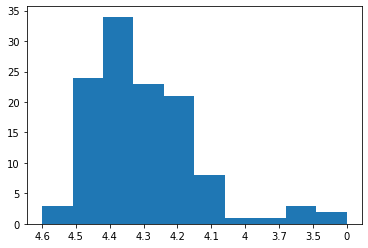

In [13]:
import matplotlib.pyplot as plt
plt.hist(df['ratings'],bins = 10)
plt.show()

In [14]:
df['ratings'] = pd.to_numeric(df['ratings'])
df['ratings_volume'] = pd.to_numeric(df['ratings_volume'])

In [17]:
# recomended Products :)
df[df['ratings_volume']>1000].sort_values("ratings",ascending=False)

,imgs,ratings,ratings_volume,product_urls,price_l
5,https://rukminim1.flixcart.com/image/612/612/j...,4.5,1170.0,/pilot-v5-pack-3-liquid-ink-rollerball-pen/p/i...,143
17,https://rukminim1.flixcart.com/image/612/612/j...,4.5,2810.0,/cello-butterflow-blue-ball-pen/p/itm54728fc4d...,95
18,https://rukminim1.flixcart.com/image/612/612/k...,4.5,2581.0,/classmate-octane-colourburst-gel-pen/p/itmfgf...,99
28,https://rukminim1.flixcart.com/image/612/612/k...,4.4,1364.0,/nataraj-classic-ball-pen/p/itm5d15346244840?p...,59
32,https://rukminim1.flixcart.com/image/612/612/k...,4.4,1767.0,/pilot-hi-techpoint-05-super-value-pack-3-blue...,109
43,https://rukminim1.flixcart.com/image/612/612/j...,4.4,4485.0,/cello-butterflow-simply-ball-pen-jar/p/itmf8a...,192
49,https://rukminim1.flixcart.com/image/612/612/k...,4.4,1498.0,/cello-signature-carbon-ball-pen/p/itmf8ab8k6h...,142
52,https://rukminim1.flixcart.com/image/612/612/j...,4.4,1478.0,/cello-technotip-ball-pen/p/itmfe8mfpncp4tjg?p...,160
72,https://rukminim1.flixcart.com/image/612/612/j...,4.3,4310.0,/cello-finegrip-jar-blue-ball-pen/p/itm5ea0b4d...,140


In [16]:
a = df[df['ratings_volume']>2000].sort_values("ratings",ascending=False)

In [241]:
p = a.values

# Products View Function

In [18]:
cnt = 0
n = 4# pages scraping
url = 'https://www.flipkart.com/search?q=pendrive&page=1'
d = {'imgs':[],'ratings':[],'ratings_volume':[],'product_urls':[],'price_l':[]}

def scrap(url):    

    global cnt
    response = urlopen(url)

    data = response.read()
    s_data = soup(data,'html.parser')
    s_obj = s_data.findAll('div',{'class':'_4ddWXP'})
    
    
    for i in s_obj:
        if i.findAll('div',{'class' : '_3LWZlK'}):
            # print("hello")
            for hit in i.findAll('div',{'class' : '_3LWZlK'}):    
                hi = hit.text.strip()    
                d['ratings'].append(hi)
        else:
            d['ratings'].append("0")



        p_url = i.a.attrs['href']
        img_lk = i.img.attrs['src']
        price = i.findAll('div',{'class':'_30jeq3'})[0].text
        try:
            rating_v = i.findAll('span',{'class':'_2_R_DZ'})[0].text
            rating_v = rating_v[1:-2]
        except:
            rating_v = "0" 
        
        d['price_l'].append(price[1:])    
        d['imgs'].append(img_lk)
        d['ratings_volume'].append(rating_v)
        d['product_urls'].append(p_url)

    if cnt==0:
        cnt = len(d['imgs'])

    if int(len(d['imgs'])) <= cnt*n-1: 
        l = len(d['imgs'])
        url = f'https://www.flipkart.com/search?q=pendrive&page={(l//cnt)+1}'
        print("k")
        scrap(url)

    df = pd.DataFrame(d)
    df['price_l'] = df['price_l'].replace(',','', regex=True)
    df['ratings_volume'] = df['ratings_volume'].replace(',','',regex=True)
    df.sort_values("ratings",axis=0,ascending = False,inplace=True)
    # print(df['ratings'])
    df.reset_index(drop=True, inplace=True)
    df['ratings'] = pd.to_numeric(df['ratings'])
    df['ratings_volume'] = pd.to_numeric(df['ratings_volume'])
    m = df[df['ratings_volume']>2000].sort_values("ratings",ascending=False)
    return m

In [19]:
x = scrap(url)

k
k
k


In [155]:
class Product:
    
    def __init__(self,p_name,no_pages=4,r_v=2000):
        
        self.p_name = p_name
        self.n = no_pages
        self.url = f'https://www.flipkart.com/search?q={self.p_name}&page=1'
        self.d = {'imgs':[],'ratings':[],'ratings_volume':[],'product_urls':[],'price_l':[]}
        self.cnt = 0
        self.r_v = r_v
        
    def get(self):
        
        response = urlopen(self.url)
        data = response.read()
        s_data = soup(data,'html.parser')
        s_obj = s_data.findAll('div',{'class':'_4ddWXP'})
        
        for i in s_obj:
            
            if i.findAll('div',{'class' : '_3LWZlK'}):
                for hit in i.findAll('div',{'class' : '_3LWZlK'}):    
                    hi = hit.text.strip()    
                    self.d['ratings'].append(hi)
                    
            else:
                self.d['ratings'].append("0")
            
            p_url = i.a.attrs['href']
            img_lk = i.img.attrs['src']
            price = i.findAll('div',{'class':'_30jeq3'})[0].text
            
            try:
                rating_v = i.findAll('span',{'class':'_2_R_DZ'})[0].text
                rating_v = rating_v[1:-2]
            except:
                rating_v = "0" 
        
            self.d['price_l'].append(price[1:])   
            self.d['imgs'].append(img_lk)
            self.d['ratings_volume'].append(rating_v)
            self.d['product_urls'].append(p_url)
        
        if self.cnt==0:
            self.cnt = len(self.d['imgs'])

        if int(len(self.d['imgs'])) <= self.cnt*self.n-1: 
            l = len(self.d['imgs'])
            self.url = f'https://www.flipkart.com/search?q={self.p_name}&page={(l//self.cnt)+1}'
            self.get()
            
        df = pd.DataFrame(self.d)
        df['price_l'] = df['price_l'].replace(',','', regex=True)
        
        df['ratings_volume'] = df['ratings_volume'].replace(',','',regex=True)
        df.sort_values("ratings",axis=0,ascending = False,inplace=True)
        df.reset_index(drop=True, inplace=True)
        df['ratings'] = pd.to_numeric(df['ratings'])
        df['ratings_volume'] = pd.to_numeric(df['ratings_volume'])
        m = df[df['ratings_volume']>self.r_v].sort_values("ratings",ascending=False)
        m = m.values
        return m

In [156]:
p = Product("pendrive",2)

In [157]:
x = p.get() 

In [158]:
print(len(x))

9


In [159]:
p_url = "https://www.flipkart.com"
products = p_url+x[:,3]

In [160]:
products


array(['https://www.flipkart.com/sandisk-sddd3-064g-i35gw-64-gb-otg-drive/p/itmf3qy9sbfamhmz?pid=ACCFFXARKRGZJMMF&lid=LSTACCFFXARKRGZJMMFV9SDEJ&marketplace=FLIPKART&q=pendrive&store=6bo%2Fjdy%2Fuar&srno=s_1_40&otracker=search&fm=organic&iid=8890706b-533c-48b5-b5a0-184f206d958e.ACCFFXARKRGZJMMF.SEARCH&ppt=None&ppn=None&ssid=1uscun224w0000001623518297751&qH=ce1d35e50180f44f',
       'https://www.flipkart.com/sandisk-cruzer-blade-16-gb-utility-pendrive/p/itmf6vyqugk3g8gn?pid=ACCCWPADYYFEJ7ZG&lid=LSTACCCWPADYYFEJ7ZGVPPMRL&marketplace=FLIPKART&q=pendrive&store=6bo%2Fjdy%2Fuar&srno=s_2_57&otracker=search&fm=organic&iid=9ece0dce-8ae0-439b-bd72-31e3183cca6e.ACCCWPADYYFEJ7ZG.SEARCH&ppt=None&ppn=None&ssid=rb0wogprts0000001623518303439&qH=ce1d35e50180f44f',
       'https://www.flipkart.com/hp-x740w-metal-usb-3-0-3-1-flash-drive-32-gb-pen/p/itm9fdb3c656dba8?pid=ACCF48HMFFEJB3HW&lid=LSTACCF48HMFFEJB3HWBCGTV3&marketplace=FLIPKART&q=pendrive&store=6bo%2Fjdy%2Fuar&srno=s_2_65&otracker=search&fm=organi